# DNN 으로 예측해보기

- https://www.kaggle.com/c/mercedes-benz-greener-manufacturing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_path = "../data/benz"
train = pd.read_csv(f'{base_path}/train.csv.zip', index_col="ID")
test = pd.read_csv(f'{base_path}/test.csv.zip', index_col="ID")
submission = pd.read_csv(f'{base_path}/sample_submission.csv.zip', index_col="ID")

train.shape, test.shape, submission.shape

((4209, 377), (4209, 376), (4209, 1))

In [4]:
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
7,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
9,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

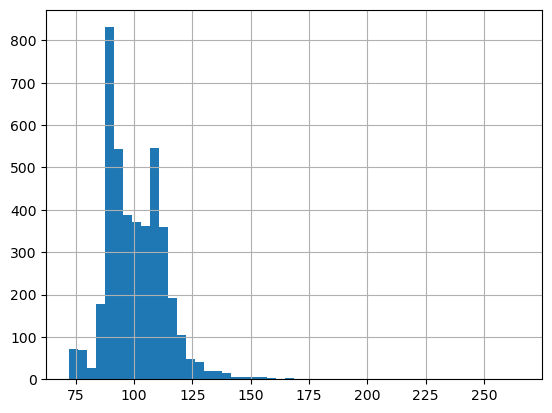

In [16]:
train["y"].hist(bins=50)

In [19]:
train["logy"] = np.log(train["y"])

<AxesSubplot:>

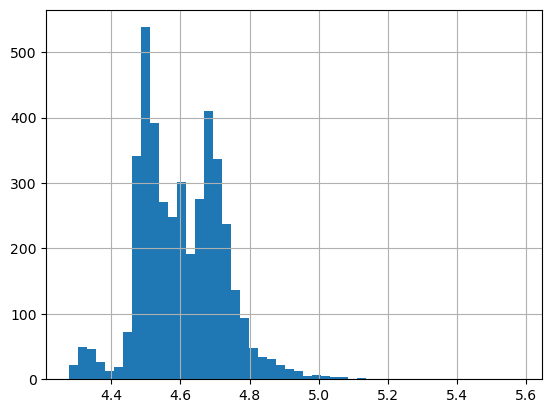

In [20]:
train["logy"].hist(bins=50)

In [28]:
zero_columns = train.sum()[train.sum() == 0].index.tolist()
zero_columns

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [31]:
train = train.drop(columns=zero_columns)
test = test.drop(columns=zero_columns)

train.shape, test.shape

((4209, 366), (4209, 364))

### One-hot-Encoding

In [32]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first", handle_unknown="ignore")
ohe

OneHotEncoder(drop='first', handle_unknown='ignore')

In [46]:
cat_col = train.describe(include="O").columns.tolist()
cat_col

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [48]:
num_col = train.describe().columns.tolist()
num_col.remove("y")
num_col.remove("logy")
num_col[:2]

['X10', 'X12']

In [63]:
train.index

Int64Index([   0,    6,    7,    9,   13,   18,   24,   25,   27,   30,
            ...
            8395, 8397, 8399, 8402, 8403, 8405, 8406, 8412, 8415, 8417],
           dtype='int64', name='ID', length=4209)

In [64]:
train_ohe = ohe.fit_transform(train[cat_col]).toarray()
train_ohe = pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out())
print(train_ohe.shape)
train_ohe = train_ohe.set_index(train.index)
train_ohe.head()

(4209, 187)


,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
test_ohe = ohe.transform(test[cat_col]).toarray()
test_ohe = pd.DataFrame(test_ohe, columns=ohe.get_feature_names_out())
test_ohe = test_ohe.set_index(test.index)
print(test_ohe.shape)
test_ohe.head()

(4209, 187)


c:\Users\chjy1\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 수치형컬럼과 합치기

In [66]:
X = pd.concat([train_ohe, train[num_col]], axis=1)

,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
8406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
8412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
X_test = pd.concat([test_ohe, test[num_col]], axis=1)
X_test

,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
8413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### 데이터 나누기